# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

bc64b7f048f490c982d02a92c77c6287


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 287


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
          # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 275.96, 'feels_like': 271.19, 'temp_min': 275.96, 'temp_max': 275.96, 'pressure': 991, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 240}, 'rain': {'1h': 0.2}, 'clouds': {'all': 100}, 'dt': 1677897490, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1677837608, 'sunset': 1677886234}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
Processing Record 2 of Set 1 | oranjemund
{'coord': {'lon': 16.4333, 'lat': -28.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.93, 'feels_like': 290.09, 'temp_min': 289.93, 'temp_max': 289.93, 'pressure': 1013, 'humidity': 93, 'sea_level': 1013, 'grnd_level': 101

{'coord': {'lon': 97.5228, 'lat': 50.5994}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 276.36, 'feels_like': 273.22, 'temp_min': 276.36, 'temp_max': 276.36, 'pressure': 1015, 'humidity': 59, 'sea_level': 1015, 'grnd_level': 865}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 274, 'gust': 10.47}, 'clouds': {'all': 100}, 'dt': 1677897495, 'sys': {'country': 'RU', 'sunrise': 1677888559, 'sunset': 1677928474}, 'timezone': 25200, 'id': 1501377, 'name': 'Kungurtug', 'cod': 200}
Processing Record 16 of Set 1 | rio tercero
{'coord': {'lon': -64.1141, 'lat': -32.173}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.37, 'feels_like': 296.08, 'temp_min': 293.4, 'temp_max': 296.37, 'pressure': 1008, 'humidity': 51, 'sea_level': 1008, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 306, 'gust': 3.84}, 'clouds

{'coord': {'lon': 128.8694, 'lat': 71.6872}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 251.8, 'feels_like': 244.8, 'temp_min': 251.8, 'temp_max': 251.8, 'pressure': 992, 'humidity': 99, 'sea_level': 992, 'grnd_level': 987}, 'visibility': 489, 'wind': {'speed': 3.51, 'deg': 126, 'gust': 4.21}, 'clouds': {'all': 100}, 'dt': 1677897500, 'sys': {'country': 'RU', 'sunrise': 1677883702, 'sunset': 1677918287}, 'timezone': 32400, 'id': 2015306, 'name': 'Tiksi', 'cod': 200}
Processing Record 32 of Set 1 | sayansk
{'coord': {'lon': 102.1648, 'lat': 54.1088}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 275.72, 'feels_like': 270.85, 'temp_min': 275.72, 'temp_max': 275.72, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 946}, 'visibility': 10000, 'wind': {'speed': 6.26, 'deg': 294, 'gust': 16.51}, 'clouds': {

{'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 277.21, 'feels_like': 272.2, 'temp_min': 277.1, 'temp_max': 277.21, 'pressure': 997, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 280}, 'clouds': {'all': 40}, 'dt': 1677897505, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1677838391, 'sunset': 1677886707}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
Processing Record 46 of Set 1 | chubbuck
{'coord': {'lon': -112.4661, 'lat': 42.9208}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 270.09, 'feels_like': 264.32, 'temp_min': 269.06, 'temp_max': 270.09, 'pressure': 1013, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1677897375, 'sys': {'type': 1, 'id': 5352, 'country': 'US'

{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.18, 'feels_like': 290.34, 'temp_min': 290.18, 'temp_max': 290.18, 'pressure': 1012, 'humidity': 92, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg': 183, 'gust': 5.68}, 'clouds': {'all': 90}, 'dt': 1677897509, 'sys': {'type': 1, 'id': 1943, 'country': 'ZA', 'sunrise': 1677904742, 'sunset': 1677950483}, 'timezone': 7200, 'id': 3361934, 'name': 'Saldanha', 'cod': 200}
Processing Record 9 of Set 2 | vaini
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 302.24, 'feels_like': 307.92, 'temp_min': 302.24, 'temp_max': 302.24, 'pressure': 1007, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 260}, 'rain': {'1h': 0.11}, 'clouds': {'all': 75}, 

{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 260.2, 'feels_like': 253.2, 'temp_min': 260.2, 'temp_max': 260.2, 'pressure': 991, 'humidity': 92, 'sea_level': 991, 'grnd_level': 933}, 'visibility': 10000, 'wind': {'speed': 7.84, 'deg': 249, 'gust': 13.71}, 'clouds': {'all': 62}, 'dt': 1677897514, 'sys': {'country': 'RU', 'sunrise': 1677886711, 'sunset': 1677923614}, 'timezone': 32400, 'id': 2027296, 'name': 'Aykhal', 'cod': 200}
Processing Record 23 of Set 2 | mount gambier
{'coord': {'lon': 140.7667, 'lat': -37.8333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.89, 'feels_like': 297.31, 'temp_min': 297.89, 'temp_max': 297.89, 'pressure': 1009, 'humidity': 34, 'sea_level': 1009, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 258, 'gust': 3.7}, 'clouds': {'

{'coord': {'lon': 30.7861, 'lat': 59.7035}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 270.95, 'feels_like': 267.29, 'temp_min': 269.7, 'temp_max': 271.09, 'pressure': 989, 'humidity': 97, 'sea_level': 989, 'grnd_level': 985}, 'visibility': 172, 'wind': {'speed': 2.72, 'deg': 128, 'gust': 7.71}, 'snow': {'1h': 0.18}, 'clouds': {'all': 100}, 'dt': 1677897519, 'sys': {'type': 2, 'id': 47750, 'country': 'RU', 'sunrise': 1677905263, 'sunset': 1677943799}, 'timezone': 10800, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}
Processing Record 40 of Set 2 | tuktoyaktuk
{'coord': {'lon': -133.0374, 'lat': 69.4541}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 238.15, 'feels_like': 231.15, 'temp_min': 238.15, 'temp_max': 238.15, 'pressure': 1027, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 290}, 'clouds': {'all': 0},

{'coord': {'lon': 148.1667, 'lat': -23.5333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.34, 'feels_like': 304.48, 'temp_min': 303.34, 'temp_max': 303.34, 'pressure': 1009, 'humidity': 50, 'sea_level': 1009, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 4.16, 'deg': 59, 'gust': 4.08}, 'clouds': {'all': 91}, 'dt': 1677897523, 'sys': {'type': 2, 'id': 2000606, 'country': 'AU', 'sunrise': 1677873839, 'sunset': 1677918888}, 'timezone': 36000, 'id': 2167426, 'name': 'Emerald', 'cod': 200}
Processing Record 8 of Set 3 | petropavlovsk-kamchatskiy
{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 266.48, 'feels_like': 259.48, 'temp_min': 266.36, 'temp_max': 266.48, 'pressure': 1009, 'humidity': 33}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 290}, 'clouds': {'all': 0}, 

{'coord': {'lon': -48.6381, 'lat': -26.2433}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.1, 'feels_like': 298.16, 'temp_min': 297.1, 'temp_max': 297.1, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1677897527, 'sys': {'type': 1, 'id': 8374, 'country': 'BR', 'sunrise': 1677834559, 'sunset': 1677879847}, 'timezone': -10800, 'id': 3449112, 'name': 'São Francisco do Sul', 'cod': 200}
Processing Record 23 of Set 3 | mar del plata
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 299.16, 'feels_like': 299.16, 'temp_min': 298.05, 'temp_max': 299.16, 'pressure': 1005, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1677897528, 'sys': {'type': 1, 'id': 8305, 'country

{'coord': {'lon': -114.3525, 'lat': 62.456}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 254.44, 'feels_like': 247.44, 'temp_min': 254.44, 'temp_max': 254.57, 'pressure': 1009, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 350}, 'clouds': {'all': 100}, 'dt': 1677897532, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 1677854108, 'sunset': 1677891836}, 'timezone': -25200, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
Processing Record 39 of Set 3 | jalu
{'coord': {'lon': 21.5482, 'lat': 29.0331}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.34, 'feels_like': 289.05, 'temp_min': 290.34, 'temp_max': 290.34, 'pressure': 1013, 'humidity': 36, 'sea_level': 1013, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.17, 'deg': 139, 'gust': 9.78}, 'clouds': {'all': 0}, 'dt': 1677897532, 'sy

{'coord': {'lon': 152.4333, 'lat': -3.6667}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.41, 'feels_like': 299.34, 'temp_min': 298.41, 'temp_max': 298.41, 'pressure': 1008, 'humidity': 90, 'sea_level': 1008, 'grnd_level': 1002}, 'visibility': 8245, 'wind': {'speed': 5.91, 'deg': 275, 'gust': 9.62}, 'rain': {'1h': 2.23}, 'clouds': {'all': 100}, 'dt': 1677897536, 'sys': {'country': 'PG', 'sunrise': 1677873435, 'sunset': 1677917245}, 'timezone': 36000, 'id': 2090021, 'name': 'Namatanai', 'cod': 200}
Processing Record 5 of Set 4 | taoudenni
{'coord': {'lon': -3.9836, 'lat': 22.6783}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.2, 'feels_like': 293.93, 'temp_min': 295.2, 'temp_max': 295.2, 'pressure': 1012, 'humidity': 18, 'sea_level': 1012, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 53, 'gust': 

{'coord': {'lon': -42.2744, 'lat': -2.7619}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.37, 'feels_like': 299.3, 'temp_min': 298.37, 'temp_max': 298.37, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 5371, 'wind': {'speed': 5.07, 'deg': 82, 'gust': 9.5}, 'clouds': {'all': 100}, 'dt': 1677897540, 'sys': {'country': 'BR', 'sunrise': 1677833795, 'sunset': 1677877557}, 'timezone': -10800, 'id': 3385899, 'name': 'Tutóia', 'cod': 200}
Processing Record 21 of Set 4 | pisco
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 296.18, 'feels_like': 296.58, 'temp_min': 294.27, 'temp_max': 296.18, 'pressure': 1009, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1677897301, 'sys': {'type': 1, 'id': 869

{'coord': {'lon': -1.0519, 'lat': 44.5875}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 271.18, 'feels_like': 271.18, 'temp_min': 271.18, 'temp_max': 274.33, 'pressure': 1024, 'humidity': 93}, 'visibility': 3900, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 93}, 'dt': 1677897545, 'sys': {'type': 1, 'id': 6448, 'country': 'FR', 'sunrise': 1677911848, 'sunset': 1677952493}, 'timezone': 3600, 'id': 6621469, 'name': "Arrondissement d'Arcachon", 'cod': 200}
Processing Record 36 of Set 4 | kavieng
{'coord': {'lon': 150.7967, 'lat': -2.5744}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.75, 'feels_like': 299.64, 'temp_min': 298.75, 'temp_max': 298.75, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 7.03, 'deg': 289, 'gust': 8.9}, 'rain': {'1h': 1.16}, 'clouds': {'all':

{'coord': {'lon': 125.4092, 'lat': -8.9266}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.33, 'feels_like': 295.3, 'temp_min': 295.33, 'temp_max': 295.33, 'pressure': 1013, 'humidity': 65, 'sea_level': 1013, 'grnd_level': 860}, 'visibility': 10000, 'wind': {'speed': 2.2, 'deg': 266, 'gust': 3.63}, 'clouds': {'all': 89}, 'dt': 1677897550, 'sys': {'country': 'TL', 'sunrise': 1677879768, 'sunset': 1677923881}, 'timezone': 32400, 'id': 1651810, 'name': 'Airai', 'cod': 200}
Processing Record 2 of Set 5 | ormara
{'coord': {'lon': 64.6357, 'lat': 25.2088}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 296.89, 'feels_like': 296.68, 'temp_min': 296.89, 'temp_max': 296.89, 'pressure': 1020, 'humidity': 52, 'sea_level': 1020, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 1.67, 'deg': 24, 'gust': 1.87}, 'clouds': {'all':

{'coord': {'lon': 22.9833, 'lat': 46.8333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 275.5, 'feels_like': 273.66, 'temp_min': 275.5, 'temp_max': 275.5, 'pressure': 1018, 'humidity': 84, 'sea_level': 1018, 'grnd_level': 948}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 221, 'gust': 1.73}, 'clouds': {'all': 88}, 'dt': 1677897556, 'sys': {'country': 'RO', 'sunrise': 1677906204, 'sunset': 1677946603}, 'timezone': 7200, 'id': 667064, 'name': 'Sâncraiu', 'cod': 200}
Processing Record 16 of Set 5 | burkhala
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 17 of Set 5 | isangel
{'coord': {'lon': 169.2667, 'lat': -19.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.79, 'feels_like': 299.79, 'temp_min': 299.79, 'temp_max': 299.79, 'pressure': 998, 'humidity': 89, 'sea_lev

{'coord': {'lon': -64.3971, 'lat': 48.9957}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 264.31, 'feels_like': 257.31, 'temp_min': 264.31, 'temp_max': 264.31, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 8.49, 'deg': 310, 'gust': 15.43}, 'clouds': {'all': 6}, 'dt': 1677897560, 'sys': {'type': 1, 'id': 807, 'country': 'CA', 'sunrise': 1677840988, 'sunset': 1677880981}, 'timezone': -18000, 'id': 6943832, 'name': 'Riviere-au-Renard', 'cod': 200}
Processing Record 32 of Set 5 | karakendzha
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 33 of Set 5 | miguel hidalgo
{'coord': {'lon': -99.2028, 'lat': 19.4225}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.64, 'feels_like': 293.39, 'temp_min': 292.11, 'temp_max': 294.82, 'pres

{'coord': {'lon': 94.7333, 'lat': 16.7833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 305.11, 'feels_like': 303.35, 'temp_min': 305.11, 'temp_max': 305.11, 'pressure': 1017, 'humidity': 24, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.93, 'deg': 319, 'gust': 4.11}, 'clouds': {'all': 0}, 'dt': 1677897565, 'sys': {'country': 'MM', 'sunrise': 1677887860, 'sunset': 1677930511}, 'timezone': 23400, 'id': 1328421, 'name': 'Pathein', 'cod': 200}
Processing Record 48 of Set 5 | ponta do sol
{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.89, 'feels_like': 291.07, 'temp_min': 289.89, 'temp_max': 292.04, 'pressure': 1019, 'humidity': 90, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 2.12, 'deg': 192, 'gust': 2.96}, 'clouds'

{'coord': {'lon': -23.5087, 'lat': 14.9215}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 293.45, 'feels_like': 293.44, 'temp_min': 293.45, 'temp_max': 293.45, 'pressure': 1014, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1677897355, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1677916172, 'sunset': 1677958948}, 'timezone': -3600, 'id': 3374333, 'name': 'Praia', 'cod': 200}
Processing Record 15 of Set 6 | cap-aux-meules
{'coord': {'lon': -61.8597, 'lat': 47.3821}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 267.16, 'feels_like': 260.16, 'temp_min': 267.16, 'temp_max': 267.18, 'pressure': 1010, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 13.89, 'deg': 320, 'gust': 18.01}, 'clouds': {'all': 75}, 'dt': 1677897483, 'sys': {'type': 1, 'id': 274, 'c

{'coord': {'lon': -22.4338, 'lat': 63.8424}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 277.41, 'feels_like': 274.35, 'temp_min': 276.12, 'temp_max': 277.41, 'pressure': 1031, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1677897574, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1677918471, 'sunset': 1677956132}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
Processing Record 31 of Set 6 | sovetskiy
{'coord': {'lon': 63.5842, 'lat': 61.3614}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 246.77, 'feels_like': 241.53, 'temp_min': 246.77, 'temp_max': 246.77, 'pressure': 1004, 'humidity': 100, 'sea_level': 1004, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 205, 'gust': 1.35}, 'clouds': {'all': 96}, 'dt': 16778975

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
# city_data_df
# print(city_data)

City          257
Lat           257
Lng           257
Max Temp      257
Humidity      257
Cloudiness    257
Wind Speed    257
Country       257
Date          257
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,275.96,93,100,6.17,AR,1677897490
1,oranjemund,-28.5500,16.4333,289.93,93,74,1.79,NA,1677897491
2,rikitea,-23.1203,-134.9692,300.19,70,60,5.04,PF,1677897491
3,qaqortoq,60.7167,-46.0333,276.03,74,55,8.41,GL,1677897491
4,butaritari,3.0707,172.7902,300.91,80,100,4.91,KI,1677897492


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,275.96,93,100,6.17,AR,1677897490
1,oranjemund,-28.5500,16.4333,289.93,93,74,1.79,NaN,1677897491
2,rikitea,-23.1203,-134.9692,300.19,70,60,5.04,PF,1677897491
3,qaqortoq,60.7167,-46.0333,276.03,74,55,8.41,GL,1677897491
4,butaritari,3.0707,172.7902,300.91,80,100,4.91,KI,1677897492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

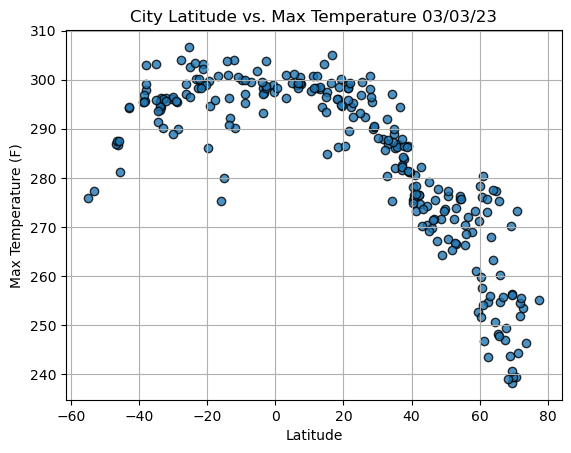

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure.
# plt.savefig("weather_data/lat_v_maxt.png")

# Show plot.
plt.show()

#### Latitude Vs. Humidity

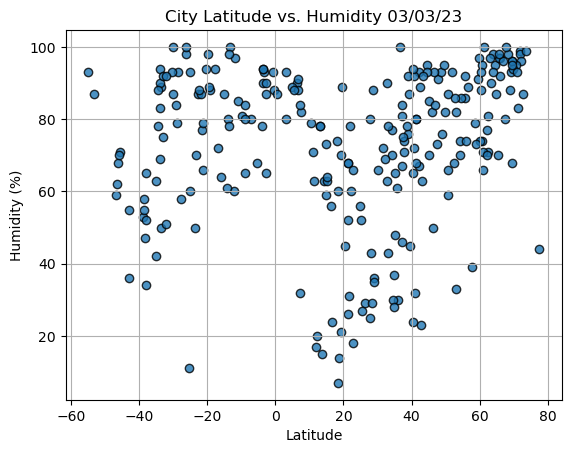

In [21]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure.
# plt.savefig("weather_data/lat_v_hum.png")

# Show plot.
plt.show()

#### Latitude Vs. Cloudiness

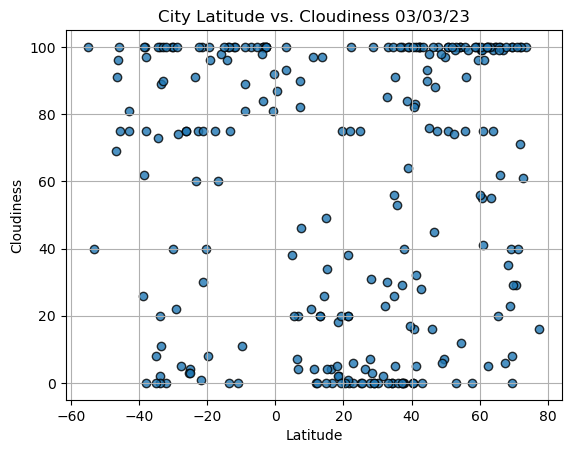

In [29]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure.
# plt.savefig("weather_data/lat_v_cloud.png")

# Show plot.
plt.show()

#### Latitude vs. Wind Speed Plot

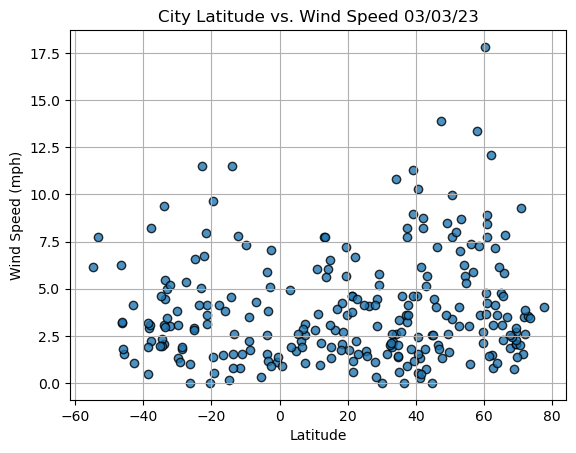

In [31]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# # Save the figure.
# plt.savefig("weather_data/lat_v_wind.png")

# Show plot.
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values, y_label, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, color="r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,qaqortoq,60.7167,-46.0333,276.03,74,55,8.41,GL,1677897491
4,butaritari,3.0707,172.7902,300.91,80,100,4.91,KI,1677897492
8,show low,34.2542,-110.0298,275.31,77,0,2.57,US,1677897493
9,jabinyanah,35.0350,10.9081,282.04,65,5,3.34,TN,1677897494
10,makakilo city,21.3469,-158.0858,298.33,68,20,4.63,US,1677897403


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,275.96,93,100,6.17,AR,1677897490
1,oranjemund,-28.5500,16.4333,289.93,93,74,1.79,NaN,1677897491
2,rikitea,-23.1203,-134.9692,300.19,70,60,5.04,PF,1677897491
5,esperance,-33.8667,121.9000,295.45,69,2,9.37,AU,1677897492
6,port alfred,-33.5906,26.8910,294.36,89,89,4.43,ZA,1677897493


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.9030727922057314


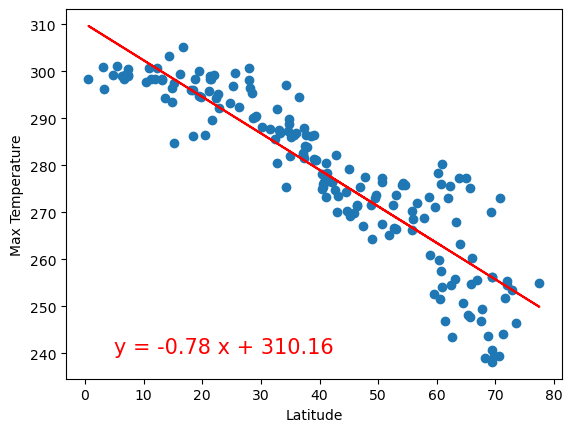

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (5,240))

The r-squared is: 0.41671061501802675


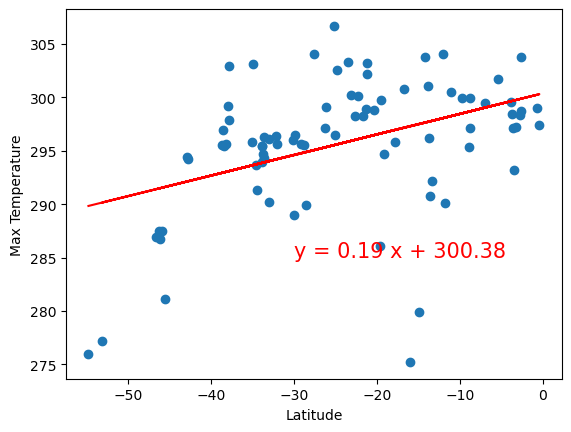

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (-30,285))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.44106296282047563


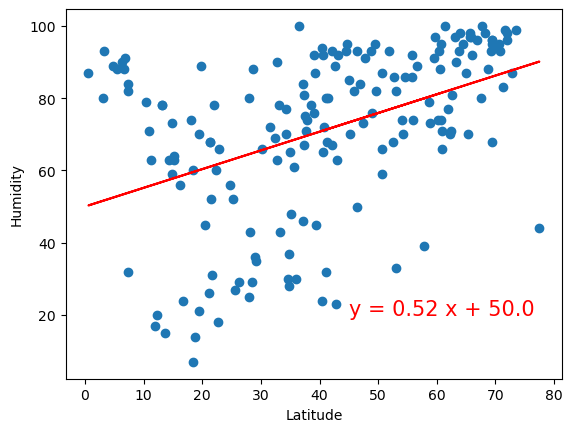

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45,20))

The r-squared is: 0.34193673131483127


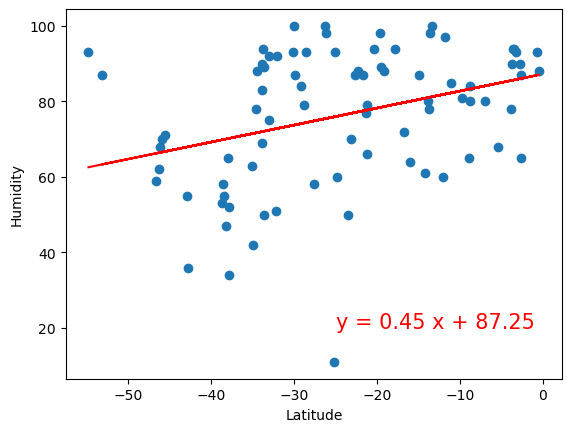

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3808352463443767


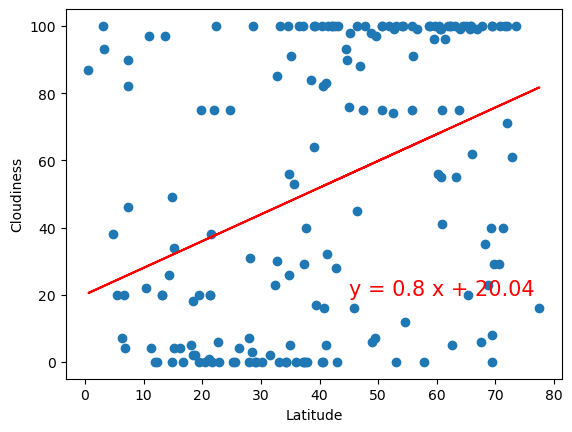

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45,20))

The r-squared is: 0.19770181576077972


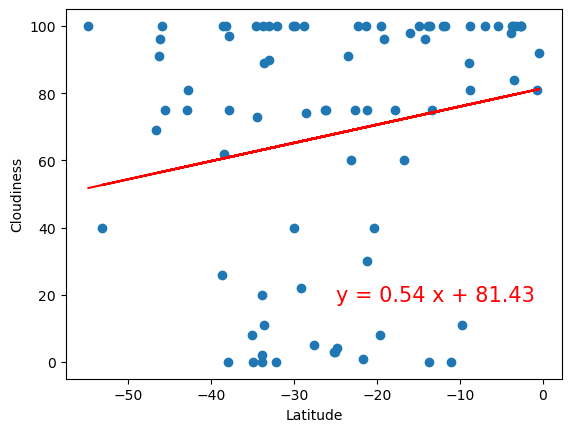

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-25,18))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.15651062766323856


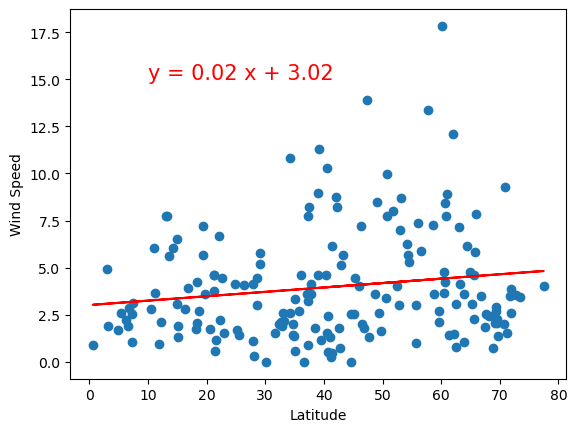

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (10,15))

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

TypeError: plot_linear_regression() takes 4 positional arguments but 5 were given

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared is: -0.08285185858063829


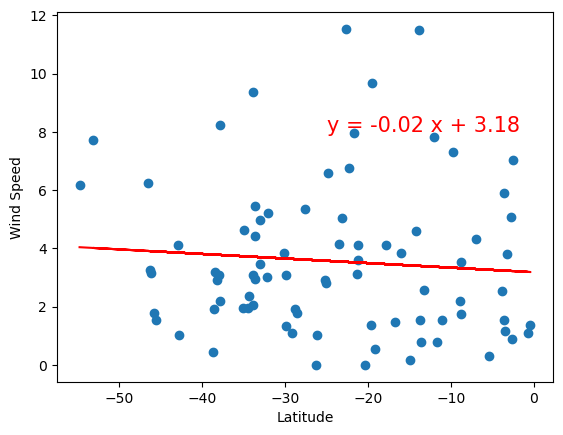

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-25,8))